# GLOBAL TERRORISM DATABASE: FROM CHAOS TO CLARITY
## The Power of Data Preprocessing & Unmasking the Unknown
## Course: Data Preparation and Visualization - Final Project

---

### PROJECT OVERVIEW
This project moves beyond standard descriptive statistics to investigate the **strategic behavior** of global terrorism over nearly five decades (1970-2017). Using the **Global Terrorism Database (GTD)**, we aim to shift the analytical focus from "What happened?" to "Why is it lethal?" and "Who is behind the silence?".

The analysis is structured into two critical investigations: deconstructing the **"Efficiency Paradox"** of attack tactics and performing a **"Ghost Hunt"** to profile unknown perpetrators using Machine Learning.

### STRATEGIC OBJECTIVES
* **The Efficiency Paradox:** Challenge the assumption that high-frequency attacks are the most dangerous by visualizing the trade-off between **Popularity** (e.g., Bombing) and **Lethality** (e.g., Hijacking).
* **Anatomy of Lethality:** Dissect the "Suicide Multiplier" effect and map "Regional Signatures" to understand how terrain and power dynamics dictate tactical choices.
* **"Ghost Hunting" (Clustering):** Address the critical data gap where ~50% of attacks are attributed to "Unknown" groups. We apply **K-Means Clustering** to profile these invisible actors into 5 distinct operational personas.

### DATASET CHARACTERISTICS
* **Source:** Global Terrorism Database (GTD) by START Consortium.
* **Scope:** 181,691 incidents (1970-2017).
* **Key Features:** `AttackType`, `WeaponType`, `Suicide`, `Casualties` (nkill + nwound), `Region`, and `Group Name`.

---

# Data Dictionary: Global Terrorism Database (GTD)

## I. Temporal Information

| Variable | Description | Data Type / Values |
| :--- | :--- | :--- |
| `iyear` | Year of incident | Numeric |
| `imonth` | Month of incident (0 = Unknown, for pre-2011 data) | Numeric |
| `iday` | Day of incident (0 = Unknown, for pre-2011 data) | Numeric |
| `approxdate` | Text description if exact date is unknown (e.g., "Mid-June 1978") | Text |
| `extended` | Did the incident extend more than 24 hours? | Categorical (1 = Yes, 0 = No) |
| `resolution` | End date of incident (if `extended` = 1) | Date |

## II. Incident Information

| Variable | Description | Data Type / Values |
| :--- | :--- | :--- |
| `summary` | Brief narrative summary of the incident. **(Note: Post-1997 only)** | Text |
| `crit1` | Criterion 1: Does the incident have political, economic, religious, or social goals? | Categorical (1 = Yes, 0 = No) |
| `crit2` | Criterion 2: Intent to coerce, intimidate, or convey message beyond immediate victims? | Categorical (1 = Yes, 0 = No) |
| `crit3` | Criterion 3: Outside the context of legitimate warfare/international humanitarian law? | Categorical (1 = Yes, 0 = No) |
| `doubtterr` | Doubt whether the incident is terrorism? **(Note: Post-1997 only)** | Categorical (1 = Yes, 0 = No, -9 = Unknown) |
| `alternative` / `alternative_txt` | If `doubtterr` = 1, most likely alternative classification | Categorical (1 = Insurgency/Guerilla, 2 = Other Crime, 3 = Inter-group Conflict, 4 = Lack of Intent, 5 = State Actor) |
| `multiple` | Part of a multiple/coordinated incident? **(Note: Post-1997 only)** | Categorical (1 = Yes, 0 = No) |
| `related` | Lists other related `eventid` if `multiple` = 1. **(Note: Post-1997 only)** | Text |

## III. Location Information

| Variable | Description | Data Type / Values |
| :--- | :--- | :--- |
| `country` / `country_txt` | Country where incident occurred | Categorical (Country code) |
| `region` / `region_txt` | Geographic region (e.g., North America, Western Europe, Southeast Asia) | Categorical (1-12) |
| `provstate` | Province, state, or first-level administrative division | Text |
| `city` | City, village, or town where incident occurred | Text |
| `vicinity` | Did incident occur in the vicinity of the city (not within city limits)? | Categorical (1 = Yes, 0 = No) |
| `location` | Additional details about location (e.g., "near embassy", "on Highway 5") | Text |
| `latitude` | Latitude of the city | Numeric |
| `longitude` | Longitude of the city | Numeric |
| `specificity` | Precision level of geo-coding | Categorical (1 = City center, 2 = Regional center (city not found), 3 = Regional center (outside city), 4 = Province/state center, 5 = Unknown) |

## IV. Attack Information

| Variable | Description | Data Type / Values |
| :--- | :--- | :--- |
| `attacktype1` / `attacktype1_txt` | Primary attack type | Categorical (1 = Assassination, 2 = Armed Assault, 3 = Bombing/Explosion, 4 = Hijacking, 5 = Hostage Taking (Barricade), 6 = Hostage Taking (Kidnapping), 7 = Facility/Infrastructure Attack, 8 = Unarmed Assault, 9 = Unknown) |
| `attacktype2` / `attacktype2_txt` | Secondary attack type (if applicable, in hierarchical order) | Categorical (Same as above) |
| `attacktype3` / `attacktype3_txt` | Tertiary attack type (if applicable) | Categorical (Same as above) |
| `success` | Was the attack successful (by attack type definition, e.g., did bomb detonate)? | Categorical (1 = Yes, 0 = No) |
| `suicide` | Was this a suicide attack? | Categorical (1 = Yes, 0 = No) |

## V. Weapon Information

| Variable | Description | Data Type / Values |
| :--- | :--- | :--- |
| `weaptype1` / `weaptype1_txt` | General weapon type used | Categorical (1 = Biological, 2 = Chemical, 3 = Radiological, 4 = Nuclear, 5 = Firearms, 6 = Explosives, 7 = Fake Weapons, 8 = Incendiary, 9 = Melee, 10 = Vehicle, 11 = Sabotage Equipment, 12 = Other, 13 = Unknown) |
| `weapsubtype1` / `weapsubtype1_txt` | More specific weapon subtype (e.g., Handgun, Letter Bomb, Timed Bomb) | Categorical |
| `weaptype2` / `weapsubtype2` | Secondary weapon type and subtype | Categorical |
| `weaptype3` / `weapsubtype3` | Tertiary weapon type and subtype | Categorical |
| `weaptype4` / `weapsubtype4` | Fourth weapon type and subtype | Categorical |
| `weapdetail` | Additional notes about weapons (e.g., gun model, concealment method) | Text |

## VI. Target/Victim Information

| Variable | Description | Data Type / Values |
| :--- | :--- | :--- |
| `targtype1` / `targtype1_txt` | General target type | Categorical (1 = Business, 2 = Government (General), 3 = Police, 4 = Military, 7 = Government (Diplomatic), 8 = Educational Institution, 10 = Journalists & Media, 14 = Private Citizens & Property, 15 = Religious Figures/Institutions, 19 = Transportation, etc.) |
| `targsubtype1` / `targsubtype1_txt` | More specific target subtype (e.g., Restaurant/Bar, Embassy, Patrol) | Categorical |
| `corp1` | Name of targeted organization/agency/company (if applicable) | Text |
| `target1` | Specific description of target (e.g., "US Embassy", "5 patrol soldiers", "President X") | Text |
| `natlty1` / `natlty1_txt` | Nationality of the target | Categorical (Country code) |
| `targtype2` / `targsubtype2` / `corp2` / `target2` / `natlty2` | Information for second target | Same as above |
| `targtype3` / `targsubtype3` / `corp3` / `target3` / `natlty3` | Information for third target | Same as above |

## VII. Perpetrator Information

| Variable | Description | Data Type / Values |
| :--- | :--- | :--- |
| `gname` | Name of perpetrator group ("Unknown" if unclear) | Text |
| `gsubname` | Name of sub-group or specific faction (if applicable) | Text |
| `gname2` / `gsubname2` | Second perpetrator group name and sub-group | Text |
| `gname3` / `gsubname3` | Third perpetrator group name and sub-group | Text |
| `guncertain1` | Is attribution to perpetrator 1 doubtful/uncertain? | Categorical (1 = Yes, 0 = No) |
| `guncertain2` | Is attribution to perpetrator 2 doubtful/uncertain? | Categorical (1 = Yes, 0 = No) |
| `guncertain3` | Is attribution to perpetrator 3 doubtful/uncertain? | Categorical (1 = Yes, 0 = No) |
| `individual` | Attack carried out by unaffiliated individual(s)? **(Note: Post-1997 only)** | Categorical (1 = Yes, 0 = No) |
| `nperps` | Total number of perpetrators involved | Numeric (-99 = Unknown) |
| `nperpcap` | Number of perpetrators captured **(Note: Post-1997 only)** | Numeric (-99 = Unknown) |
| `claimed` | Did (group 1) claim responsibility? **(Note: Post-1997 only)** | Categorical (1 = Yes, 0 = No) |
| `claimmode` / `claimmode_txt` | Mode of claim (e.g., call, letter, video) **(Note: Post-1997 only)** | Categorical (1-10) |
| `claim2` / `claimmode2` | Group 2 claim and mode **(Note: Post-1997 only)** | Categorical |
| `claim3` / `claimmode3` | Group 3 claim and mode **(Note: Post-1997 only)** | Categorical |
| `compclaim` | Competing claims by multiple groups? **(Note: Post-1997 only)** | Categorical (1 = Yes, 0 = No, -9 = Unknown) |
| `motive` | Specific motive of the attack (if stated) **(Note: Post-1997 only)** | Text |

## VIII. Casualties & Consequences

| Variable | Description | Data Type / Values |
| :--- | :--- | :--- |
| `nkill` | Total confirmed fatalities (including victims and perpetrators) | Numeric |
| `nkillus` | Number of US citizens killed | Numeric |
| `nkillter` | Number of perpetrators killed | Numeric |
| `nwound` | Total confirmed injured (including victims and perpetrators) | Numeric |
| `nwoundus` | Number of US citizens injured | Numeric |
| `nwoundte` | Number of perpetrators injured | Numeric |
| `property` | Was there property damage? | Categorical (1 = Yes, 0 = No, -9 = Unknown) |
| `propextent` / `propextent_txt` | Extent of property damage | Categorical (1 = Catastrophic (>= $1B), 2 = Major (>= $1M), 3 = Minor (< $1M), 4 = Unknown) |
| `propvalue` | Estimated property damage value (USD at time of incident) | Numeric |
| `propcomment` | Notes describing property damage | Text |
| `ishostkid` | Were there hostages taken or kidnapping? | Categorical (1 = Yes, 0 = No, -9 = Unknown) |
| `nhostkid` | Total number of hostages/kidnap victims | Numeric (-99 = Unknown) |
| `nhostkidus` | Number of hostages/victims who are US citizens | Numeric |
| `nhours` | Duration of kidnapping (in hours, if < 24 hours) | Numeric (-99 = Unknown) |
| `ndays` | Duration of kidnapping (in days, if > 24 hours) | Numeric |
| `divert` | Country where vehicle was diverted (hijacking) or victims taken (kidnapping) | Text |
| `kidhijcountry` | Country where incident was resolved | Text |
| `ransom` | Was ransom demanded? | Categorical (1 = Yes, 0 = No, -9 = Unknown) |
| `ransomamt` | Ransom amount demanded (USD) | Numeric (-99 = Unknown) |
| `ransomamtus` | Ransom amount demanded from US sources (USD) | Numeric (-99 = Unknown) |
| `ransompaid` | Ransom amount paid (USD) | Numeric (-99 = Unknown) |
| `ransompaidus` | Ransom amount paid by US sources (USD) | Numeric (-99 = Unknown) |
| `ransomnote` | Notes on ransom demands or non-monetary demands **(Note: Post-1997 only)** | Text |
| `hostkidoutcome` / `hostkidoutcome_txt` | Outcome of hostage/kidnapping situation | Categorical (1 = Rescue Attempt, 2 = Hostage(s) Released, 3 = Hostage(s) Escaped, 4 = Hostage(s) Killed, 5 = Successful Rescue, 6 = Combined, 7 = Unknown) |
| `nreleased` | Number of hostages/victims who survived (released, escaped, or rescued) | Numeric (-99 = Unknown) |

## IX. Additional Information & Sources

| Variable | Description | Data Type / Values |
| :--- | :--- | :--- |
| `addnotes` | Additional notes on relevant details not captured elsewhere **(Note: Post-1997 only)** | Text |
| `scite1` | First citation source **(Note: Post-1997 only)** | Text |
| `scite2` | Second citation source **(Note: Post-1997 only)** | Text |
| `scite3` | Third citation source **(Note: Post-1997 only)** | Text |
| `dbsource` | Data collection source origin (e.g., PGIS, CETIS, ISVG, START) | Text |
| `INT_LOG` | International (Logistics): Did perpetrator group cross borders to execute attack? | Categorical (1 = Yes, 0 = No, -9 = Unknown) |
| `INT_IDEO` | International (Ideological): Does perpetrator nationality differ from target nationality? | Categorical (1 = Yes, 0 = No, -9 = Unknown) |
| `INT_MISC` | International (Miscellaneous): Does attack location differ from target nationality? | Categorical (1 = Yes, 0 = No, -9 = Unknown) |
| `INT_ANY` | International (Any): Is attack international by any criterion (LOG, IDEO, MISC)? | Categorical (1 = Yes, 0 = No, -9 = Unknown) |

---

**Dataset Scope:** 181,691 attacks | 205 countries | 12 regions | 135 variables | 1970-2017 (48 years)

# PART 1: INITIALIZATION & IMPORT LIBRARIES

## 1.1 Import Libraries

In [103]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, QuantileTransformer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import warnings
import squarify

warnings.filterwarnings('ignore')

# Setup style for visualizations
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 1.2 Set up color

In [104]:
theme_colors = [
    "#8C1B13",  # deep wine red
    "#D73030",  # strong red
    "#E7642E",  # burnt orange
    "#E6B01B",  # warm golden yellow
    "#C65C8A",  # muted pink-purple
    "#7E3FA4"   # controlled royal purple
]

GREY_DARK = '#404040'
GREY_OTHER = '#A9A9A9'
COLOR_TEXT = "#1f2f40"  
INSIGHT_COLOR = "#d62728"   

## 1.3 Load Data

In [105]:
# Load data
df_raw = pd.read_csv('data/globalterrorismdb.csv', encoding='latin-1', low_memory=False)

print(f"Data loaded successfully!")
print(f"Data size: {df_raw.shape}")
print(f"Time range: {df_raw['iyear'].min()} - {df_raw['iyear'].max()}")

Data loaded successfully!
Data size: (181691, 135)
Time range: 1970 - 2017


# PART 2: SETTING - THE INVESTIGATION SETUP
**Objective:** Introduce context, problem (Unknown data) and research questions.

## Background
The Global Terrorism Database contains over 181,000 terrorist attacks from 1970-2017. However, a large proportion of incidents have unknown perpetrators (gname = "Unknown"). 

## Problem
How can we better understand these "Unknown" groups? Do they share common characteristics or belong to different "personas"?

## Research Questions
- How many behavioral clusters exist in the "Unknown" data?
- What are the characteristics of each group in terms of tactics, weapons, targets, and danger level?

# PART 3: PROBLEM - "CLEANING" THE CRIME SCENE
**Objective:** Perform Data Cleaning and Preprocessing. Illustrate differences before and after processing.

## 3.1 First Clue - "Contradictory Statements"
**Problem:** Logical error `nkill < nkillus` (Total deaths < US citizen deaths).  
**Solution:** Assumption: Update Total Deaths to match US Deaths.  

In [106]:
# Check and fix nkill < nkillus error
# Store original data for comparison
df_clean = df_raw.copy()

# Find contradictory records where total deaths < US citizen deaths
contradictions_before = df_clean[(df_clean['nkill'] < df_clean['nkillus']) & 
                                  (df_clean['nkill'].notna()) & 
                                  (df_clean['nkillus'].notna())]

print(f"Contradictory records found (nkill < nkillus): {len(contradictions_before)}")

# Fix: Set nkill = nkillus when nkill < nkillus (assume US deaths were correctly recorded)
mask = (df_clean['nkill'] < df_clean['nkillus']) & (df_clean['nkill'].notna()) & (df_clean['nkillus'].notna())
df_clean.loc[mask, 'nkill'] = df_clean.loc[mask, 'nkillus']

# Verify fix
contradictions_after = df_clean[(df_clean['nkill'] < df_clean['nkillus']) & 
                                 (df_clean['nkill'].notna()) & 
                                 (df_clean['nkillus'].notna())]

print(f"Contradictory records after fix: {len(contradictions_after)}")
print(f"Fixed {len(contradictions_before) - len(contradictions_after)} contradictory records!")

Contradictory records found (nkill < nkillus): 5
Contradictory records after fix: 0
Fixed 5 contradictory records!


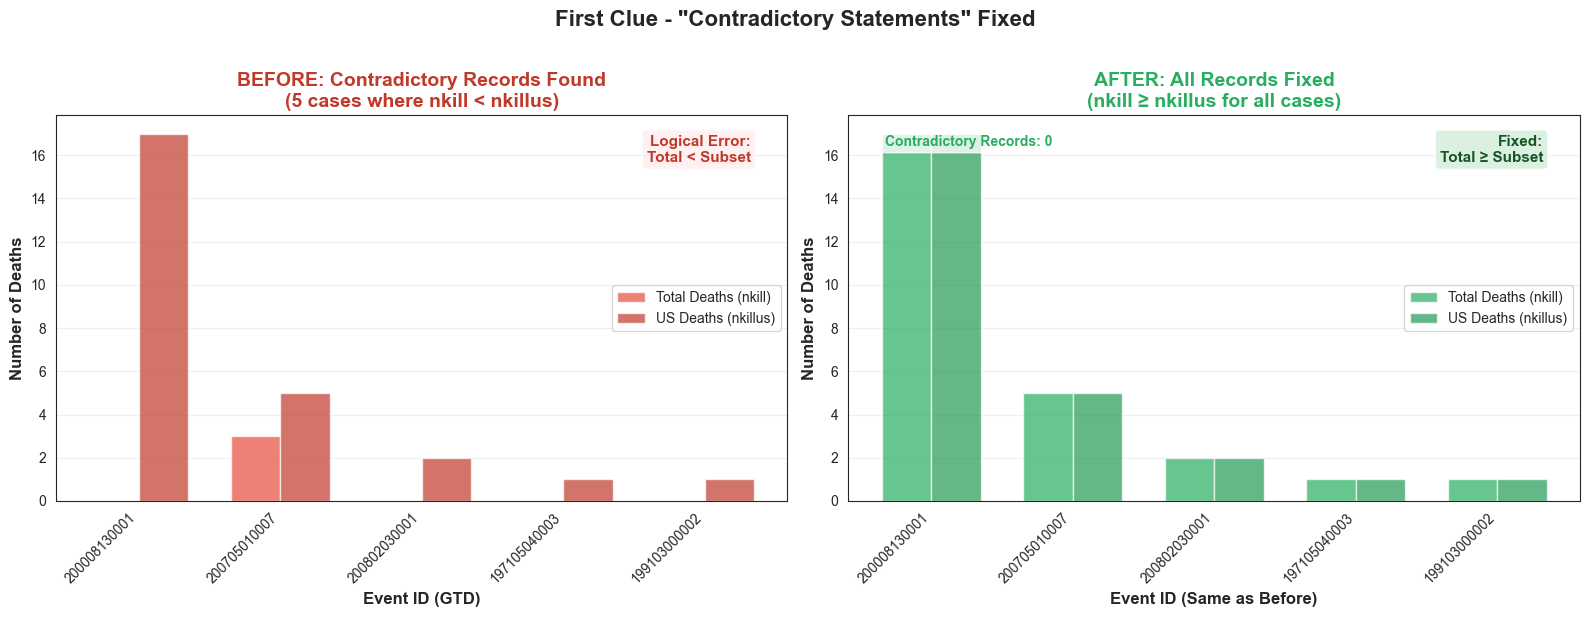

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE: Show contradictory records
before_data = df_raw[(df_raw['nkill'] < df_raw['nkillus']) & 
                     (df_raw['nkill'].notna()) & 
                     (df_raw['nkillus'].notna())].copy()

if len(before_data) > 0:
    # Sample for visualization (top 10 by difference)
    before_data['difference'] = before_data['nkillus'] - before_data['nkill']
    before_sample = before_data.nlargest(10, 'difference')
    
    x_pos = np.arange(len(before_sample))
    width = 0.35
    
    axes[0].bar(x_pos - width/2, before_sample['nkill'], width, 
               label='Total Deaths (nkill)', color='#e74c3c', alpha=0.7)
    axes[0].bar(x_pos + width/2, before_sample['nkillus'], width,
               label='US Deaths (nkillus)', color='#c0392b', alpha=0.7)
    
    axes[0].set_xlabel('Event ID (GTD)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Number of Deaths', fontsize=12, fontweight='bold')
    axes[0].set_title(f'BEFORE: Contradictory Records Found\n({len(before_data)} cases where nkill < nkillus)', 
                     fontsize=14, fontweight='bold', color='#c0392b')
    axes[0].set_xticks(x_pos)
    # Use actual Event IDs from GTD (eventid column)
    if 'eventid' in before_sample.columns:
        axes[0].set_xticklabels([str(int(eid)) for eid in before_sample['eventid']], rotation=45, ha='right')
    else:
        axes[0].set_xticklabels([f'ID:{idx}' for idx in before_sample.index], rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add annotation showing the logical error
    axes[0].text(0.95, 0.95, 'Logical Error:\nTotal < Subset', 
                transform=axes[0].transAxes, ha='right', va='top',
                bbox=dict(boxstyle='round', facecolor='#fee', alpha=0.8),
                fontsize=11, fontweight='bold', color='#c0392b')

# AFTER: Show the same records after fixing
# Get the same incident IDs that were problematic before
if len(before_data) > 0:
    # Get the fixed versions of those same incidents
    before_sample_ids = before_sample.index
    after_sample = df_clean.loc[before_sample_ids].copy()
    
    x_pos = np.arange(len(after_sample))
    width = 0.35
    
    axes[1].bar(x_pos - width/2, after_sample['nkill'], width, 
               label='Total Deaths (nkill)', color='#27ae60', alpha=0.7)
    axes[1].bar(x_pos + width/2, after_sample['nkillus'], width,
               label='US Deaths (nkillus)', color='#229954', alpha=0.7)
    
    axes[1].set_xlabel('Event ID (Same as Before)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Number of Deaths', fontsize=12, fontweight='bold')
    axes[1].set_title('AFTER: All Records Fixed\n(nkill ≥ nkillus for all cases)', 
                     fontsize=14, fontweight='bold', color='#27ae60')
    axes[1].set_xticks(x_pos)
    # Use the same Event IDs as BEFORE panel
    if 'eventid' in after_sample.columns:
        axes[1].set_xticklabels([str(int(eid)) for eid in after_sample['eventid']], rotation=45, ha='right')
    else:
        axes[1].set_xticklabels([f'ID:{idx}' for idx in after_sample.index], rotation=45, ha='right')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add annotation showing the fix
    axes[1].text(0.95, 0.95, 'Fixed:\nTotal ≥ Subset', 
                transform=axes[1].transAxes, ha='right', va='top',
                bbox=dict(boxstyle='round', facecolor='#d4edda', alpha=0.8),
                fontsize=11, fontweight='bold', color='#155724')
    
    # Verify and display statistics
    after_contradictions = df_clean[(df_clean['nkill'] < df_clean['nkillus']) & 
                                    (df_clean['nkill'].notna()) & 
                                    (df_clean['nkillus'].notna())]
    
    axes[1].text(0.05, 0.95, f'Contradictory Records: {len(after_contradictions)}', 
                transform=axes[1].transAxes, ha='left', va='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=10, fontweight='bold', color='#27ae60')

plt.suptitle('First Clue - "Contradictory Statements" Fixed', 
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 3.2 Second Clue - "Secret Language of Missing Values"
**Problem:** Inconsistent error codes (-9, -99, NaN, "Unknown").  
**Solution:** Standardize all to one consistent value (e.g., `np.nan` or "Unknown").

In [108]:
# Replace values -9, -99 with NaN
# Identify numeric columns that may contain error codes
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

# Store original data for comparison BEFORE any changes
df_before_codes = df_clean.copy()

# Replace error codes with NaN in numeric columns
for col in numeric_cols:
    df_clean[col] = df_clean[col].replace([-9, -99], np.nan)

# For text columns, standardize "Unknown" variations
text_cols = df_clean.select_dtypes(include=['object']).columns
for col in text_cols:
    # Standardize various forms of "unknown" to "Unknown"
    df_clean[col] = df_clean[col].replace({
        'unknown': 'Unknown',
        'UNKNOWN': 'Unknown',
        'Unknown ': 'Unknown',
        ' Unknown': 'Unknown'
    })

print("Error codes standardized successfully!")
print(f"Numeric columns processed: {len(numeric_cols)}")
print(f"Text columns processed: {len(text_cols)}")

Error codes standardized successfully!
Numeric columns processed: 77
Text columns processed: 58


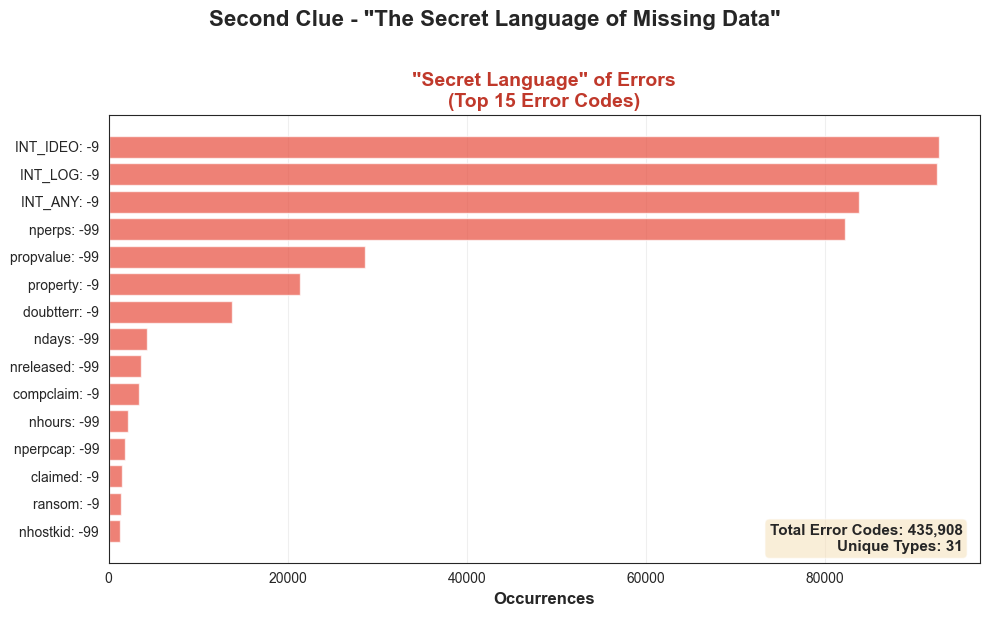

In [109]:
# Visual Word Cloud or error code statistics table 
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# BEFORE: Count occurrences of error codes across numeric columns
error_code_counts = {}
for col in numeric_cols:
    count_neg9 = (df_before_codes[col] == -9).sum()
    count_neg99 = (df_before_codes[col] == -99).sum()
    if count_neg9 > 0:
        error_code_counts[f'{col}: -9'] = count_neg9
    if count_neg99 > 0:
        error_code_counts[f'{col}: -99'] = count_neg99

# Create bar chart for BEFORE state
if error_code_counts:
    top_errors = dict(sorted(error_code_counts.items(), key=lambda x: x[1], reverse=True)[:15])
    ax.barh(list(top_errors.keys()), list(top_errors.values()), color='#e74c3c', alpha=0.7)
    ax.set_xlabel('Occurrences', fontsize=12, fontweight='bold')
    ax.set_title('"Secret Language" of Errors\n(Top 15 Error Codes)', 
                     fontsize=14, fontweight='bold', color='#c0392b')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)
    
    # Add total count
    total_errors = sum(error_code_counts.values())
    ax.text(0.98, 0.02, f'Total Error Codes: {total_errors:,}\nUnique Types: {len(error_code_counts)}', 
                transform=ax.transAxes, ha='right', va='bottom',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=11, fontweight='bold')

plt.suptitle('Second Clue - "The Secret Language of Missing Data"', 
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 3.3 Third Clue - "Forgotten Cases"
**Problem:** Too many missing values (NaN) in features.  
**Solution:** Remove columns with excessively high missing rates (> threshold).

In [110]:
# Calculate missing ratio and drop columns
# Store column count before
columns_before = df_clean.shape[1]

# Calculate missing ratio for each column
missing_ratios = (df_clean.isnull().sum() / len(df_clean)) * 100

# Set threshold for dropping columns (e.g., 60% missing)
missing_threshold = 90

# Identify columns to drop
cols_to_drop = missing_ratios[missing_ratios > missing_threshold].index.tolist()

print(f"Columns with >{missing_threshold}% missing values: {len(cols_to_drop)}")
print(f"\nTop 10 columns to be dropped:")
print(missing_ratios[missing_ratios > missing_threshold].sort_values(ascending=False).head(10))

# Drop columns
df_clean = df_clean.drop(columns=cols_to_drop)

# Store column count after
columns_after = df_clean.shape[1]

print(f"\nDropped {len(cols_to_drop)} columns!")
print(f"Features: {columns_before} → {columns_after}")

Columns with >90% missing values: 63

Top 10 columns to be dropped:
gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
claimmode3          99.926799
claimmode3_txt      99.926799
gsubname2           99.911938
claim3              99.824978
guncertain3         99.823877
dtype: float64

Dropped 63 columns!
Features: 135 → 72


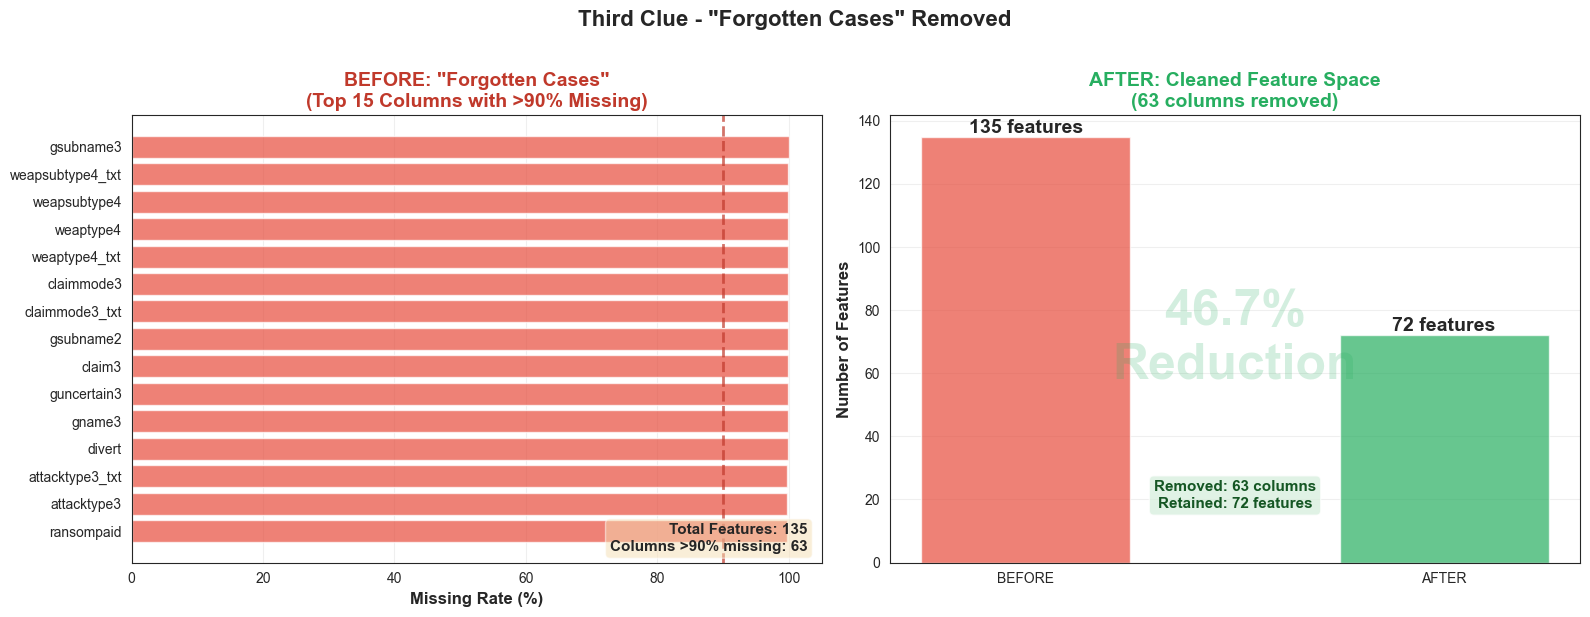

In [111]:
# Visual comparison of features count Before-After
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE: Show top columns with highest missing rates
if len(cols_to_drop) > 0:
    top_missing = missing_ratios[missing_ratios > missing_threshold].sort_values(ascending=False)[:15]
    
    axes[0].barh(range(len(top_missing)), top_missing.values, color='#e74c3c', alpha=0.7)
    axes[0].set_yticks(range(len(top_missing)))
    axes[0].set_yticklabels(top_missing.index, fontsize=10)
    axes[0].set_xlabel('Missing Rate (%)', fontsize=12, fontweight='bold')
    axes[0].set_title(f'BEFORE: "Forgotten Cases"\n(Top 15 Columns with >{missing_threshold}% Missing)', 
                     fontsize=14, fontweight='bold', color='#c0392b')
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].axvline(x=missing_threshold, color='#c0392b', linestyle='--', linewidth=2, alpha=0.7)
    
    # Add annotation
    axes[0].text(0.98, 0.02, f'Total Features: {columns_before}\nColumns >{missing_threshold}% missing: {len(cols_to_drop)}', 
                transform=axes[0].transAxes, ha='right', va='bottom',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=11, fontweight='bold')

# AFTER: Feature count comparison
categories = ['BEFORE', 'AFTER']
values = [columns_before, columns_after]
colors_bar = ['#e74c3c', '#27ae60']

bars = axes[1].bar(categories, values, color=colors_bar, alpha=0.7, width=0.5)

# Add value labels on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(val)} features',
                ha='center', va='bottom', fontsize=14, fontweight='bold')

axes[1].set_ylabel('Number of Features', fontsize=12, fontweight='bold')
axes[1].set_title(f'AFTER: Cleaned Feature Space\n({len(cols_to_drop)} columns removed)', 
                 fontsize=14, fontweight='bold', color='#27ae60')
axes[1].grid(axis='y', alpha=0.3)

# Add reduction percentage
reduction_pct = ((columns_before - columns_after) / columns_before) * 100
axes[1].text(0.5, 0.5, f'{reduction_pct:.1f}%\nReduction', 
            transform=axes[1].transAxes, ha='center', va='center',
            fontsize=36, fontweight='bold', color='#27ae60', alpha=0.2)

# Add summary box
axes[1].text(0.5, 0.15, f'Removed: {len(cols_to_drop)} columns\nRetained: {columns_after} features', 
            transform=axes[1].transAxes, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='#d4edda', alpha=0.7),
            fontsize=11, fontweight='bold', color='#155724')

plt.suptitle('Third Clue - "Forgotten Cases" Removed', 
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 3.4 Case Study "Cleaning" #1: `nperps`
**Problem:** Negative values (-99) in column `nperps` (number of perpetrators).  
**Solution:** Convert negative values to NaN for clean analysis.

In [112]:
# Handle nperps column - replace negative values and zeros with NaN
nperps_before = df_before_codes['nperps'].copy()

# Count problematic values in BEFORE state
neg_count_before = (nperps_before < 0).sum()
zero_count_before = (nperps_before == 0).sum()
print(f"Negative values in nperps before cleaning: {neg_count_before}")
print(f"Zero values in nperps before cleaning: {zero_count_before}")

# Clean: Replace 0 with NaN (illogical - no perpetrators)
df_clean.loc[df_clean['nperps'] == 0, 'nperps'] = np.nan

# Count problematic values in AFTER state
neg_after = (df_clean['nperps'] < 0).sum()
zero_after = (df_clean['nperps'] == 0).sum()
print(f"\nNegative values in nperps after cleaning: {neg_after}")
print(f"Zero values in nperps after cleaning: {zero_after}")

Negative values in nperps before cleaning: 82220
Zero values in nperps before cleaning: 139

Negative values in nperps after cleaning: 0
Zero values in nperps after cleaning: 0


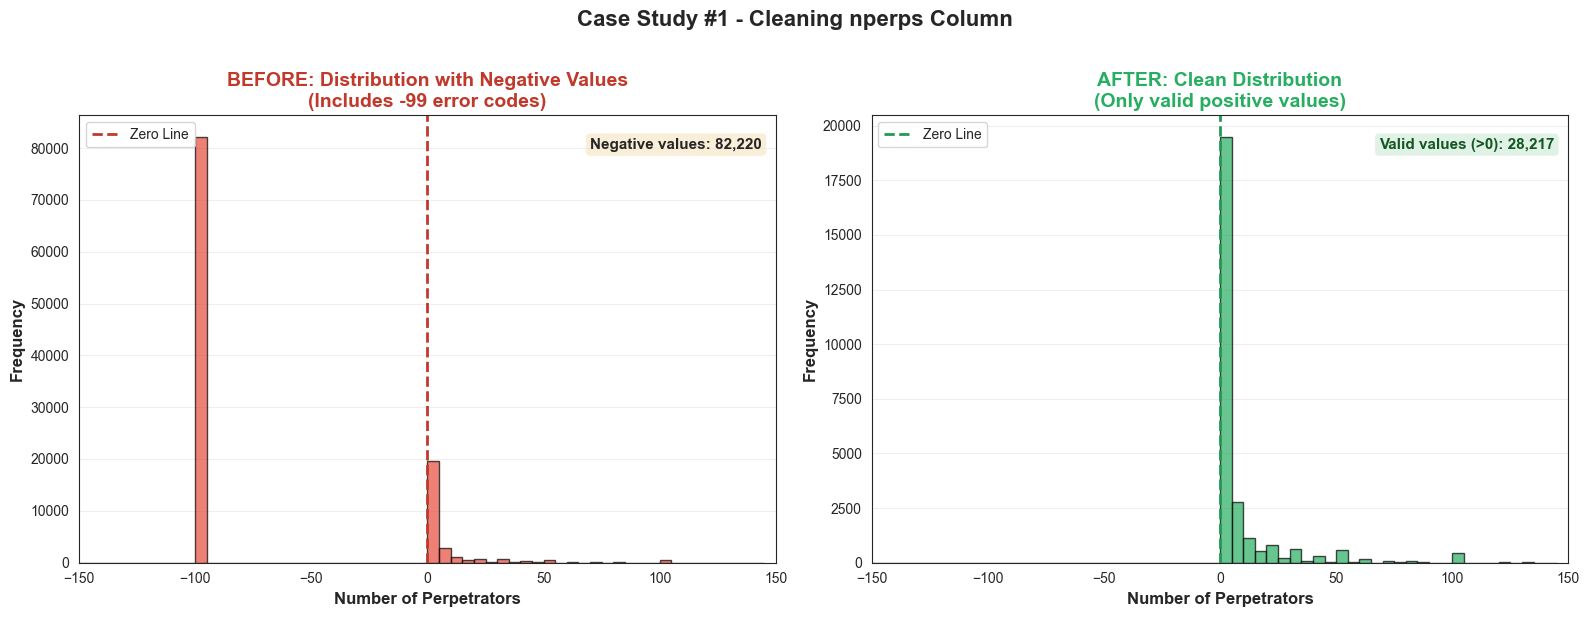

In [113]:
# Draw 2 histograms comparing Before-After for nperps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

zoom_range = (-150, 150) 
bins_setting = range(-150, 150, 5)  

# BEFORE: Filter data in zoom range
before_data_zoom = nperps_before[(nperps_before >= zoom_range[0]) & 
                                  (nperps_before <= zoom_range[1])]

axes[0].hist(before_data_zoom, bins=bins_setting, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='#c0392b', linestyle='--', linewidth=2, label='Zero Line')
axes[0].set_xlabel('Number of Perpetrators', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('BEFORE: Distribution with Negative Values\n(Includes -99 error codes)', 
                 fontsize=14, fontweight='bold', color='#c0392b')
axes[0].set_xlim(zoom_range)  # Zoom vào vùng có lỗi
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add annotation
neg_count = (nperps_before < 0).sum()
axes[0].text(0.98, 0.95, f'Negative values: {neg_count:,}', 
            transform=axes[0].transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            fontsize=11, fontweight='bold')

# AFTER: Filter data - only positive values (> 0)
after_data_zoom = df_clean['nperps'][(df_clean['nperps'] > 0) & 
                                      (df_clean['nperps'] <= zoom_range[1])]

axes[1].hist(after_data_zoom, bins=bins_setting, color='#27ae60', alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='#229954', linestyle='--', linewidth=2, label='Zero Line')
axes[1].set_xlabel('Number of Perpetrators', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('AFTER: Clean Distribution\n(Only valid positive values)', 
                 fontsize=14, fontweight='bold', color='#27ae60')
axes[1].set_xlim(zoom_range)  # Same zoom range
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Add annotation showing valid data only
valid_count = (df_clean['nperps'] > 0).sum()
axes[1].text(0.98, 0.95, f'Valid values (>0): {valid_count:,}', 
            transform=axes[1].transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='#d4edda', alpha=0.7),
            fontsize=11, fontweight='bold', color='#155724')

plt.suptitle('Case Study #1 - Cleaning nperps Column', 
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 3.5 Case Study "Cleaning" #2: `nhostkid`
**Problem:** Negative values (-99) in column `nhostkid` (number of hostages/kidnap victims).  
**Solution:** Convert negative and zero values to NaN for clean analysis.

In [114]:
# BEFORE: Get original data before any cleaning
nhostkid_before = df_before_codes['nhostkid'].copy()

# Count problematic values in BEFORE state
neg_count_before = (nhostkid_before < 0).sum()
zero_count_before = (nhostkid_before == 0).sum()
print(f"Negative values in nhostkid before cleaning: {neg_count_before}")
print(f"Zero values in nhostkid before cleaning: {zero_count_before}")

# AFTER: Create a cleaned version for demonstration
nhostkid_after = nhostkid_before.copy()
# Replace negative values with NaN (error codes like -99)
nhostkid_after = nhostkid_after.replace([-9, -99], np.nan)
# Replace 0 with NaN (illogical - no hostages but marked as kidnapping)
nhostkid_after = nhostkid_after.replace(0, np.nan)

# Count problematic values in AFTER state
neg_after = (nhostkid_after < 0).sum()
zero_after = (nhostkid_after == 0).sum()
print(f"\nNegative values in nhostkid after cleaning: {neg_after}")
print(f"Zero values in nhostkid after cleaning: {zero_after}")

Negative values in nhostkid before cleaning: 1237
Zero values in nhostkid before cleaning: 6

Negative values in nhostkid after cleaning: 0
Zero values in nhostkid after cleaning: 0


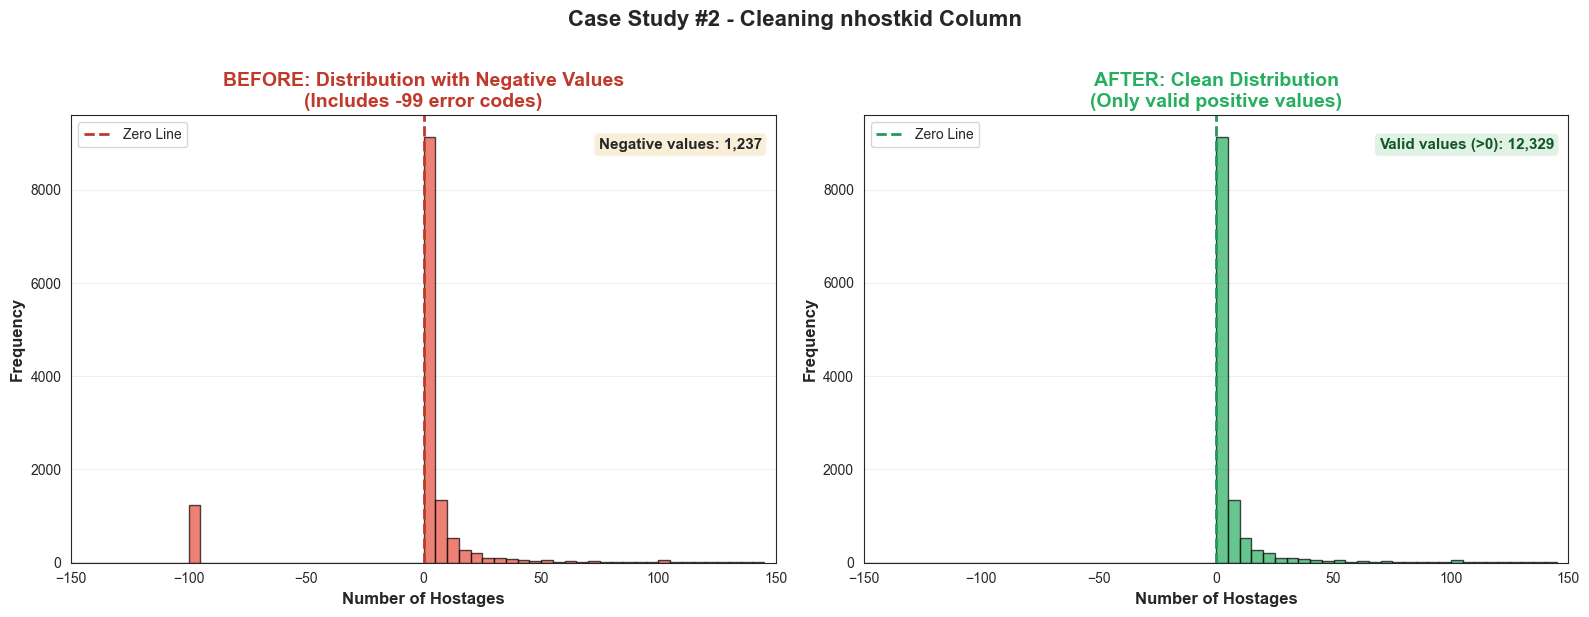

In [115]:
# Draw 2 histograms comparing Before-After for nhostkid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

zoom_range = (-150, 150) 
bins_setting = range(-150, 150, 5)  

# BEFORE: Filter data in zoom range
before_data_zoom = nhostkid_before[(nhostkid_before >= zoom_range[0]) & 
                                    (nhostkid_before <= zoom_range[1])]

axes[0].hist(before_data_zoom, bins=bins_setting, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='#c0392b', linestyle='--', linewidth=2, label='Zero Line')
axes[0].set_xlabel('Number of Hostages', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('BEFORE: Distribution with Negative Values\n(Includes -99 error codes)', 
                 fontsize=14, fontweight='bold', color='#c0392b')
axes[0].set_xlim(zoom_range)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add annotation
neg_count = (nhostkid_before < 0).sum()
axes[0].text(0.98, 0.95, f'Negative values: {neg_count:,}', 
            transform=axes[0].transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            fontsize=11, fontweight='bold')

# AFTER: Filter data - only positive values (> 0)
after_data_zoom = nhostkid_after[(nhostkid_after > 0) & 
                                  (nhostkid_after <= zoom_range[1])]

axes[1].hist(after_data_zoom, bins=bins_setting, color='#27ae60', alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='#229954', linestyle='--', linewidth=2, label='Zero Line')
axes[1].set_xlabel('Number of Hostages', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('AFTER: Clean Distribution\n(Only valid positive values)', 
                 fontsize=14, fontweight='bold', color='#27ae60')
axes[1].set_xlim(zoom_range)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Add annotation showing valid data only
valid_count = (nhostkid_after > 0).sum()
axes[1].text(0.98, 0.95, f'Valid values (>0): {valid_count:,}', 
            transform=axes[1].transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='#d4edda', alpha=0.7),
            fontsize=11, fontweight='bold', color='#155724')

plt.suptitle('Case Study #2 - Cleaning nhostkid Column', 
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 3.6 Data Prep Summary
**Result:** Create clean dataset `df_clean` ready for modeling.

In [116]:
# Consolidate clean dataset
print(f"Clean dataset is ready!")
print(f"Size: {df_clean.shape}")
print(f"Number of columns: {df_clean.shape[1]}")

Clean dataset is ready!
Size: (181691, 72)
Number of columns: 72


# PART 4: RESOLUTION - UNVEILING THE GHOST (CLUSTERING)
**Objective:** Cluster "Unknown" data to discover behavioral groups (Personas).

## 4.1 Feature Engineering & Selection
**Task:** Select important features for the model (AttackType, WeaponType, Region, Lethality...).  
**Solution:** Encoding (One-hot/Label), Scaling (StandardScaler).

In [117]:
# Feature Engineering - Create derived features for analysis and clustering

# 1. Total casualties (killed + wounded)
df_clean['casualties'] = df_clean['nkill'].fillna(0) + df_clean['nwound'].fillna(0)

# 2. Severity classification based on casualties
def classify_severity(casualties):
    if casualties == 0:
        return 'No Casualties'
    elif casualties <= 5:
        return 'Low'
    elif casualties <= 25:
        return 'Medium'
    elif casualties <= 100:
        return 'High'
    else:
        return 'Extreme'

df_clean['severity'] = df_clean['casualties'].apply(classify_severity)

# 3. Unknown group indicator (for filtering later)
df_clean['is_unknown'] = (df_clean['gname'] == 'Unknown').astype(int)

# 4. Standardize ISIS group names (multiple variants exist)
isis_variants = [
    'Islamic State of Iraq and the Levant (ISIL)',
    'Islamic State of Iraq (ISI)',
    'Islamic State (IS)',
    'Islamic State of Iraq and Syria (ISIS)'
]
df_clean['gname_clean'] = df_clean['gname'].replace(isis_variants, 'ISIS/ISIL')

# 5. Civilian target indicator
df_clean['is_civilian_target'] = df_clean['targtype1_txt'].str.contains(
    'Private Citizens', case=False, na=False
).astype(int)

# Display summary of engineered features
print("Feature Engineering completed!")
print(f"\nNew features added:")
print(f"- casualties: Total victims (killed + wounded)")
print(f"- severity: Classification based on casualties")
print(f"- is_unknown: Binary indicator for Unknown groups")
print(f"- gname_clean: Standardized group names (e.g., ISIS variants)")
print(f"- is_civilian_target: Binary indicator for civilian targets")

print(f"\nSeverity distribution:")
print(df_clean['severity'].value_counts())

print(f"\nUnknown groups: {df_clean['is_unknown'].sum():,} ({df_clean['is_unknown'].mean()*100:.1f}%)")
print(f"Civilian targets: {df_clean['is_civilian_target'].sum():,} ({df_clean['is_civilian_target'].mean()*100:.1f}%)")

Feature Engineering completed!

New features added:
- casualties: Total victims (killed + wounded)
- severity: Classification based on casualties
- is_unknown: Binary indicator for Unknown groups
- gname_clean: Standardized group names (e.g., ISIS variants)
- is_civilian_target: Binary indicator for civilian targets

Severity distribution:
severity
No Casualties    73897
Low              73069
Medium           27911
High              5970
Extreme            844
Name: count, dtype: int64

Unknown groups: 82,782 (45.6%)
Civilian targets: 43,511 (23.9%)


## 4.2 First Failure - When the Machine is "Haunted"
**Purpose:** Demo clustering results on poorly processed data or wrong feature selection.

In [118]:
num_raw = ["nkill", "nwound", "nperps", "nhostkid", "ndays", "success"]
cat_cols = ["attacktype1_txt", "targtype1_txt", "weaptype1_txt", "region_txt"]

# Subset needed columns
df = df_raw[num_raw + cat_cols].copy()

# Minimal NaN handling
# numeric → median
df[num_raw] = df[num_raw].fillna(df[num_raw].median())

# categorical → mode
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# inimal encoding (just ordinal)
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

# KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df["cluster"] = kmeans.fit_predict(df)

# Centroids 
centroids = kmeans.cluster_centers_

df.cluster.value_counts()

cluster
0    153329
4     28318
1        38
3         4
2         2
Name: count, dtype: int64

## 4.3 Turning Point - 5 "Faces" of the Enemy
**Purpose:** Run KMeans on clean data (`df_clean`).  
**Configuration:** `n_clusters = 5`.  
**Labeling:** Assign cluster labels (0-4) to original dataframe.

In [119]:
dfu = df_raw.copy()

# Winsorize numeric outliers
for col in num_raw:
    p99 = dfu[col].quantile(0.99)
    dfu[col] = dfu[col].clip(upper=p99)

# Log + quantile transform
for col in num_raw:
    dfu[f"log_{col}"] = np.log1p(dfu[col])

num_cols = [f"log_{c}" for c in num_raw]

qt = QuantileTransformer(output_distribution="normal", random_state=0)
dfu[num_cols] = qt.fit_transform(dfu[num_cols])

# Frequency encode categoricals (top 15)
def frequency_encode(df, col, top_k=15):
    freq = df[col].value_counts()
    keep = set(freq.index[:top_k])
    df[col] = df[col].where(df[col].isin(keep), "__OTHER__")
    return df

for col in cat_cols:
    dfu = frequency_encode(dfu, col, top_k=15)

# Column transformer WITH IMPUTERS
preprocess = ColumnTransformer(
    transformers=[
        ("cat",
         Pipeline(steps=[
             ("impute", SimpleImputer(strategy="most_frequent")),
             ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
         ]),
         cat_cols),

        ("num",
         Pipeline(steps=[
             ("impute", SimpleImputer(strategy="median")),
             ("scale", StandardScaler())
         ]),
         num_cols),
    ],
    remainder="drop"
)

# PCA only
pca = PCA(n_components=50, random_state=0)  # keep more components if needed

# MiniBatchKMeans
kmeans = MiniBatchKMeans(
    n_clusters=5,
    batch_size=4096,  # larger batch size for speed
    max_iter=200,
    random_state=0
)

# 8. Full pipeline
pipeline = Pipeline(
    steps=[
        ("prep", preprocess),
        ("pca", pca),
        ("kmeans", kmeans)
    ]
)

# Fit ONLY on unknown gname
df_unknown = dfu[dfu["gname"] == "Unknown"].copy()

clusters = pipeline.fit_predict(df_unknown)

df_unknown["cluster"] = clusters

df_unknown.cluster.value_counts()


cluster
0    33295
3    17898
1    13291
4    11022
2     7276
Name: count, dtype: int64

# PART 5: INSIGHTS & VISUALIZATION (CLUSTER ANALYSIS)
**Objective:** Visualize characteristics of the 5 clusters just discovered.

**Definition of 5 Clusters (According to scenario):**
* Cluster 0: The Agitator (Amateur/Low-level)
* Cluster 1: The Guerrilla
* Cluster 2: The Specialist (Kidnapping)
* Cluster 3: The Mass-Casualty Bomber
* Cluster 4: The Assassin

## 5.1 Power Map: Who Dominates by Volume?
**Visual:** Treemap or Bar chart comparing incident volume of 5 clusters.  
**Highlight:** Cluster 0 (Amateur) dominates.

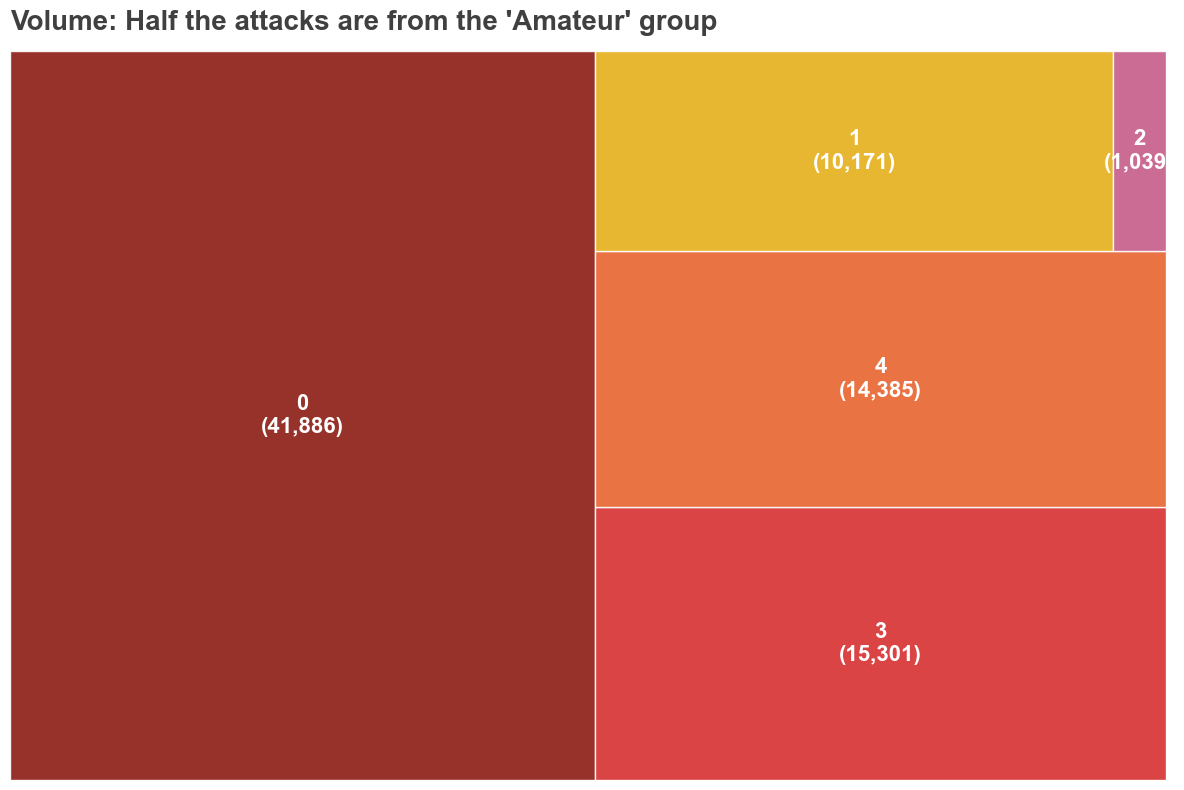

In [121]:
# Setting colors
GREY_DARK = '#404040'
GREY_LIGHT = '#E0E0E0'
GREY_OTHER = '#A9A9A9'

# Ensure required columns are present and clean
cols_to_check = ['nkill', 'nwound', 'success']
for col in cols_to_check:
    if col not in df_clean.columns:
        df_clean[col] = 0
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

df_clean['cluster'] = df_clean['cluster'].astype(str)

# Create treemap
counts = df_clean['cluster'].value_counts().reset_index()
counts.columns = ['cluster', 'count']
counts = counts.sort_values('count', ascending=False)

# Simple Number Labels
labels = [f"{r.cluster}\n({r['count']:,})" for i, r in counts.iterrows()]

# Plot
plt.figure(figsize=(12, 8))
squarify.plot(sizes=counts['count'], label=labels, color=theme_colors, alpha=0.9, 
              text_kwargs={'fontsize': 16, 'fontweight': 'bold', 'color': 'white'})

plt.title("Volume: Half the attacks are from the 'Amateur' group", 
          fontsize=20, fontweight='bold', color=GREY_DARK, pad=15, loc='left')
plt.axis('off')
plt.tight_layout()
plt.show()

## 5.2 Who is the Most Dangerous?
**Visual:** Bar chart comparing average lethality (casualties) of 5 clusters.  
**Highlight:** Cluster 3 (Bomber) and Cluster 1 (Guerrilla).

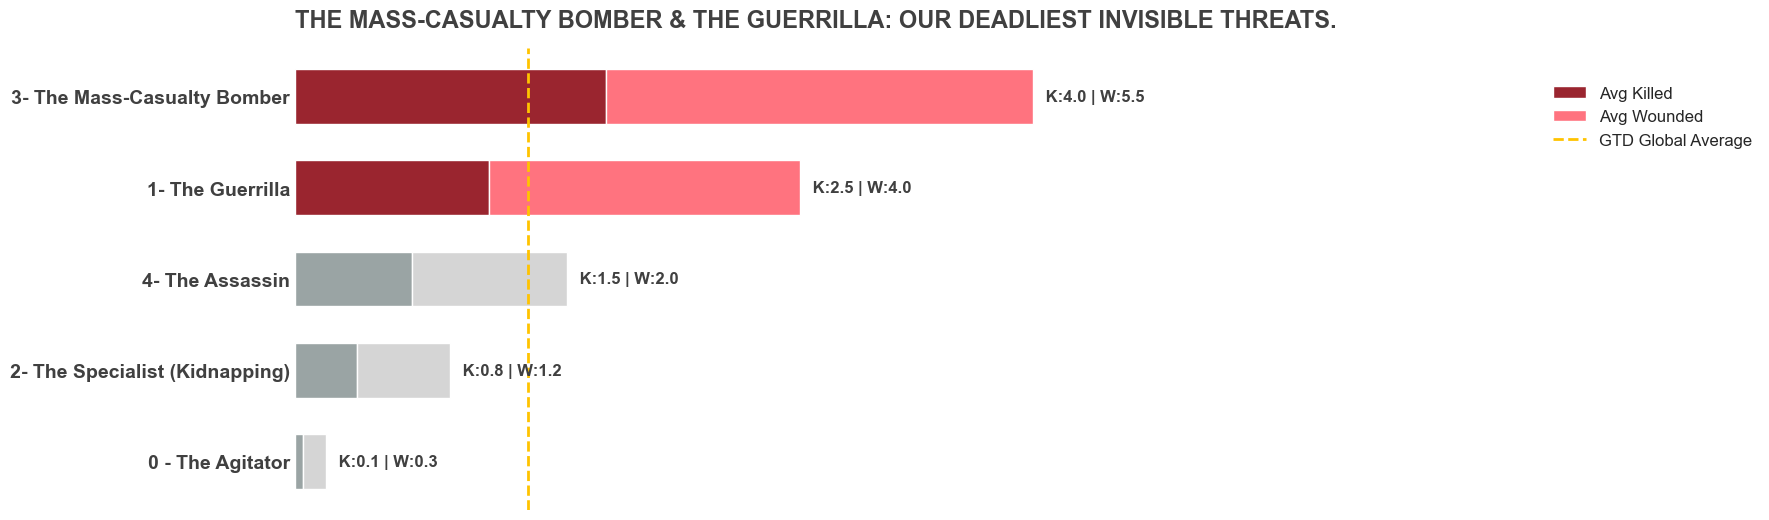

In [122]:
# Cluster Names
cluster_map = {
    '0': '0 - The Agitator',
    '1': '1- The Guerrilla',
    '2': '2- The Specialist (Kidnapping)',
    '3': '3- The Mass-Casualty Bomber',
    '4': '4- The Assassin'
}
highlight_clusters = ['1', '3']

# Colors
GREY_DARK = '#404040'
GREY_CASUALTY_KILL = "#9AA4A4" 
GREY_CASUALTY_WOUND = "#D5D5D5" 
HIGHLIGHT_CASUALTY_KILL = "#9A252F" # Striking Red
HIGHLIGHT_CASUALTY_WOUND = "#FF737F" # Light Contrast

# 2. Mock Data for Demonstration 
data = {
    'cluster': [0, 1, 2, 3, 4],
    'nkill': [0.1, 2.5, 0.8, 4.0, 1.5],
    'nwound': [0.3, 4.0, 1.2, 5.5, 2.0]
}
df_unknown = pd.DataFrame(data)
df_unknown['cluster'] = df_unknown['cluster'].astype(str)
global_avg_casualties = 3.0 


# --- 3. Modified plot_average_casualties function (Final Title Update) ---
def plot_average_casualties(df, ax, global_avg_casualties):
    
    # 1. Calcute averages and sort
    agg = df.groupby('cluster')[['nkill', 'nwound']].mean()
    agg['total'] = agg['nkill'] + agg['nwound']
    agg = agg.sort_values('total', ascending=True) # Sort ascending for horizontal bar chart
    
    indices = np.arange(len(agg))
    width = 0.6
    
    # 2. Plot bars with highlights
    highlight_clusters = ['1', '3']
    
    for i, (cluster_num, row) in enumerate(agg.iterrows()):
        is_highlight = cluster_num in highlight_clusters
        
        c_kill = HIGHLIGHT_CASUALTY_KILL if is_highlight else GREY_CASUALTY_KILL
        c_wound = HIGHLIGHT_CASUALTY_WOUND if is_highlight else GREY_CASUALTY_WOUND
            
        ax.barh(i, row['nkill'], width, color=c_kill, edgecolor='white', 
                label='Avg Killed' if i == 0 else None)
        ax.barh(i, row['nwound'], width, left=row['nkill'], color=c_wound, edgecolor='white', 
                label='Avg Wounded' if i == 0 else None)
        
        # add text labels
        total_val = row['nkill'] + row['nwound']
        ax.text(total_val + 0.1, i, f" K:{row['nkill']:.1f} | W:{row['nwound']:.1f}", 
                va='center', fontsize=12, fontweight='bold', color=GREY_DARK)

    # 3. Global Average
    ax.axvline(x=global_avg_casualties, color='#FFC300', linestyle='--', linewidth=2, label='Global Average') 

    # 4. Axes and Labels
    ax.set_yticks(indices)
    
    named_labels = [cluster_map.get(str(i), i) for i in agg.index] 
    ax.set_yticklabels(named_labels, fontsize=14, fontweight='bold', color=GREY_DARK) 
    
    # FINAL STORY TITLE
    ax.set_title("THE MASS-CASUALTY BOMBER & THE GUERRILLA: OUR DEADLIEST INVISIBLE THREATS.", 
                  fontsize=17, fontweight='bold', color=GREY_DARK, pad=15, loc='left')
    
    # Declutter 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.tick_params(axis='y', length=0)
    
    # 5. Legend 
    legend_elements = [
        Patch(facecolor=HIGHLIGHT_CASUALTY_KILL, label='Avg Killed'),
        Patch(facecolor=HIGHLIGHT_CASUALTY_WOUND, label='Avg Wounded'),
        mlines.Line2D([], [], color='#FFC300', linestyle='--', linewidth=2, label='GTD Global Average')
    ]
    ax.legend(handles=legend_elements, 
              loc='upper right',             
              bbox_to_anchor=(1.9, 0.95),    
              ncol=1,                       
              frameon=False, 
              fontsize=12)
    
# . Plotting the result 
fig, ax = plt.subplots(figsize=(10, 6))
plot_average_casualties(df_unknown, ax, global_avg_casualties)
plt.tight_layout()

## 5.3 Tactical Fingerprint
**Visual:** 100% Stacked Bar Chart showing AttackType proportions in each cluster.  
**Highlight:** Specialization (Cluster 2 only kidnapping, Cluster 3 only bombing).

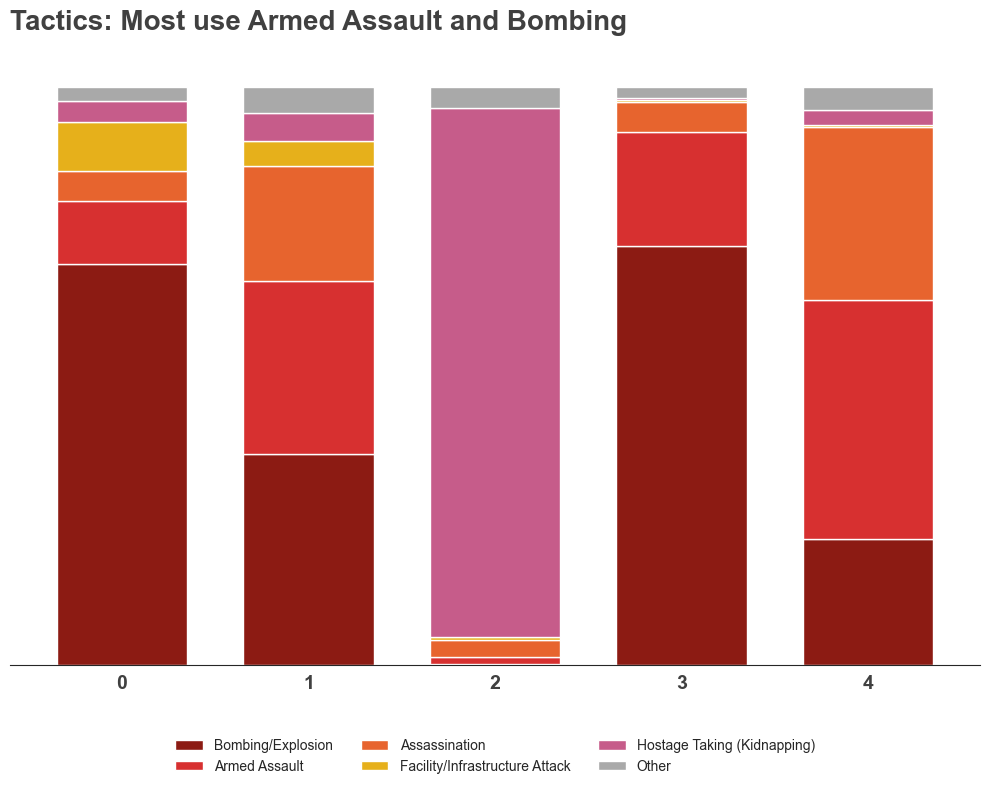

In [123]:
# Data preparation - use real clustered data loaded in section 5.1
df_viz = df_clean.copy()

col_name = 'attacktype1_txt'
# Get Top 5 categories
top_cats = df_viz[col_name].value_counts().nlargest(5).index.tolist()

# Group others
temp_col = df_viz[col_name].apply(lambda x: x if x in top_cats else 'Other')

# Create Crosstab and Normalize
ct = pd.crosstab(df_viz['cluster'], temp_col)
ct_norm = ct.div(ct.sum(axis=1), axis=0)

# Reorder columns to ensure consistency with colors
ordered_cols = [c for c in top_cats if c in ct_norm.columns]
if 'Other' in ct_norm.columns:
    ordered_cols.append('Other')
ct_norm = ct_norm[ordered_cols]

# Map Colors
color_map = []
for col in ordered_cols:
    if col == 'Other':
        color_map.append(GREY_OTHER)
    else:
        idx = top_cats.index(col)
        color_map.append(theme_colors[idx % len(theme_colors)])

# Plotting
plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.gca()  # Get current axis

ct_norm.plot(kind='bar', stacked=True, ax=ax, color=color_map, width=0.7, edgecolor='white')

# Formatting
ax.set_xticklabels(ct_norm.index, rotation=0, fontsize=14, fontweight='bold', color=GREY_DARK)

# Story title
ax.set_title("Tactics: Most use Armed Assault and Bombing",
             fontsize=20, fontweight='bold', color=GREY_DARK, pad=20, loc='left')

# Legend below the chart
ax.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3, frameon=False, title="")

# Declutter (Remove spines and Y axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlabel("")

plt.tight_layout()
plt.show()

## 5.4 Operational Efficiency
**Visual:** Area chart or Bar chart comparing Success Rate between clusters.  
**Highlight:** Compare with average level.

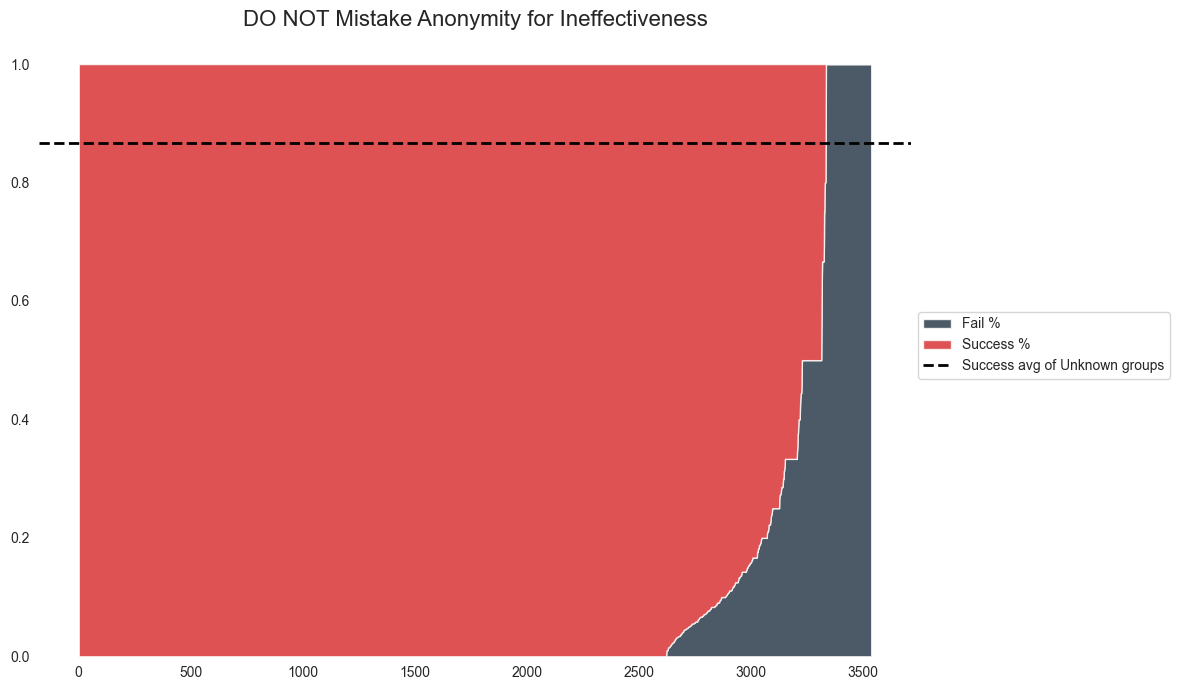

In [ ]:
def plot_success_failure_area(df):
    """
    Draw stacked area chart comparing success % and fail % between groups (gname).
    Input: df with 2 columns: 'success' and 'gname'
    """
    # Data processing
    # Calculate success/failure rate by group
    grouped = df.groupby('gname')['success'].agg(['mean', 'count'])
    grouped['fail_rate'] = 1 - grouped['mean']
    grouped['success_rate'] = grouped['mean']

    # Sort groups by success rate descending for better visualization
    grouped = grouped.sort_values('success_rate', ascending=False)

    # Calculate reference line: Average success rate of Unknown groups
    known_groups = grouped[grouped.index == 'Unknown']
    reference_success = known_groups['success_rate'].mean()

    # Data preparation
    x = np.arange(len(grouped))
    success = grouped['success_rate'].values
    fail = grouped['fail_rate'].values
    labels = grouped.index.tolist()

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.stackplot(x, fail, success, labels=['Fail %', 'Success %'],colors=[COLOR_TEXT, INSIGHT_COLOR], alpha=0.8)

    # Reference line: success rate of known groups
    plt.axhline(
        y=reference_success,
        linestyle='--',
        linewidth=2,
        color='black',
        label='Success avg of Unknown groups'
    )

    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.title("DO NOT Mistake Anonymity for Ineffectiveness", fontsize=16)
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

plot_success_failure_area(df_clean)